In [ ]:
install.packages("readxl")
library(readxl)
install.packages("survival")
library(survival)
install.packages("ggsurvfit")
library(ggsurvfit)
install.packages("gtsummary")
library(gtsummary)
install.packages("broom.helpers")
library(broom.helpers)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘labelled’



Attaching package: ‘broom.helpers’


The following objects are masked from ‘package:gtsummary’:

    all_categorical, all_continuous, all_contrasts, all_dichotomous,
    all_interaction, all_intercepts




In [ ]:
df <- read_excel("/content/points5A.xlsx",sheet=2)
df <- na.omit (df)
head(df)

N pacienta,N statusov,N vaccin,vaccina,diagnoz,vozrast,gender,zadacha,remissia,dni zhil,⋯,MI 0,MI 1,MI 2,MI 3,MI11,НСТ0,НСТ1,НСТ2,НСТ3,НСТ11
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,6,8,3,1,66,1,0,0,424,⋯,4.7,3.0,3.4,3.0,2.1,9,7,8,9,7
7,9,6,1,2,50,0,0,-2,646,⋯,3.0,4.0,2.4,4.0,3.2,4,5,3,14,4
8,10,6,2,1,42,1,0,-2,767,⋯,3.3,4.3,3.0,4.6,4.0,7,10,12,18,18
11,5,8,3,1,54,0,0,-2,564,⋯,3.0,3.0,5.2,3.8,3.0,5,2,7,10,12
12,6,8,3,2,45,0,1,2,505,⋯,3.2,3.8,2.9,3.6,3.0,6,9,8,7,7
22,6,9,2,1,56,0,1,1,414,⋯,2.8,2.4,2.3,3.2,3.0,5,7,7,10,3


In [ ]:
df <- df[, c("dni zhil", "zhiv", "chimio", "gender", "IgA3")]
head(df)

ERROR: Error in df[, c("dni zhil", "zhiv", "chimio", "gender", "IgA3")]: object of type 'closure' is not subsettable


In [ ]:
boxplot(df$IgA3 ~ df$zhiv)

ERROR: Error in df$IgA3: object of type 'closure' is not subsettable


In [ ]:
df$zhiv

ERROR: Error in df$zhiv: object of type 'closure' is not subsettable


In [ ]:
plot(df$zhiv, df$IgA3)

ERROR: Error in df$zhiv: object of type 'closure' is not subsettable


In [ ]:
names(df)

[1] "dni zhil" "zhiv"     "chimio"   "gender"   "IgA3"

In [ ]:
names(df) = c('dni_zhil','zhiv','chimio','gender','IgA3')

Оставим нужные значения.

In [ ]:
df <- df[df["chimio"] == 0,]
head(df)

dni_zhil,zhiv,chimio,gender,IgA3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
424,1,0,1,3.80
646,0,0,0,1.40
767,0,0,1,2.00
564,0,0,0,2.70
505,1,0,0,1.40
414,1,0,0,1.45


In [ ]:
km <- survfit(Surv(dni_zhil, event = 1 - zhiv) ~ 1, data = df)
print(km, print.rmean = TRUE)

Call: survfit(formula = Surv(dni_zhil, event = 1 - zhiv) ~ 1, data = df)

      n events rmean* se(rmean) median 0.95LCL 0.95UCL
[1,] 30     17   1268       246    703     564      NA
    * restricted mean with upper limit =  3061 


Построим кривую дожития без указания цензурирования.

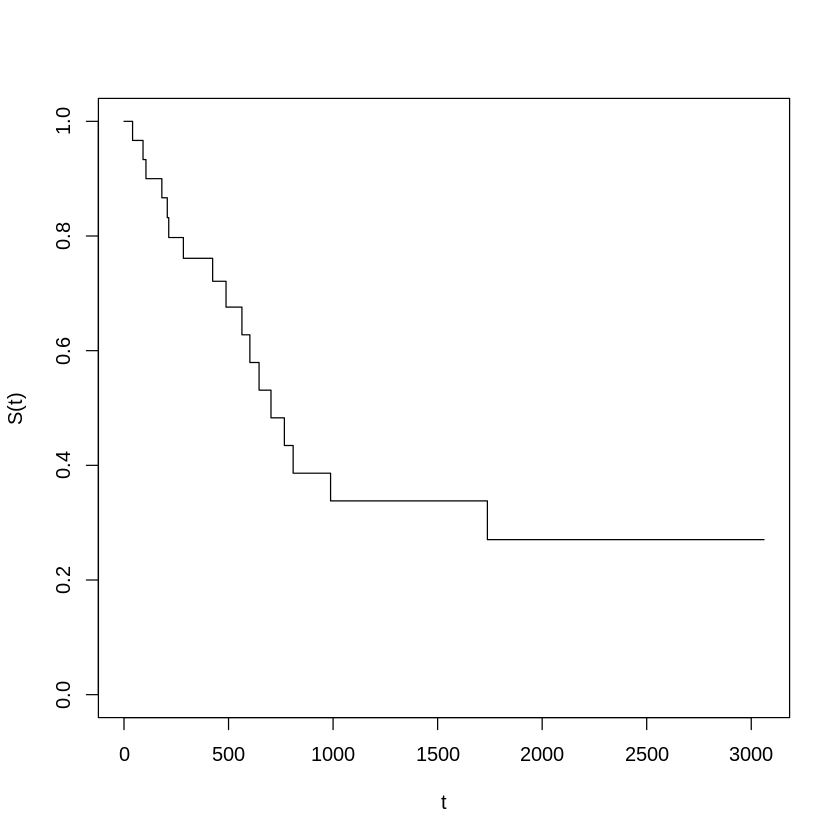

In [ ]:
plot(km, mark.time = FALSE, col = 1, conf.int = FALSE, xlab = "t", ylab = "S(t)")

Добавим указание цензурирования.

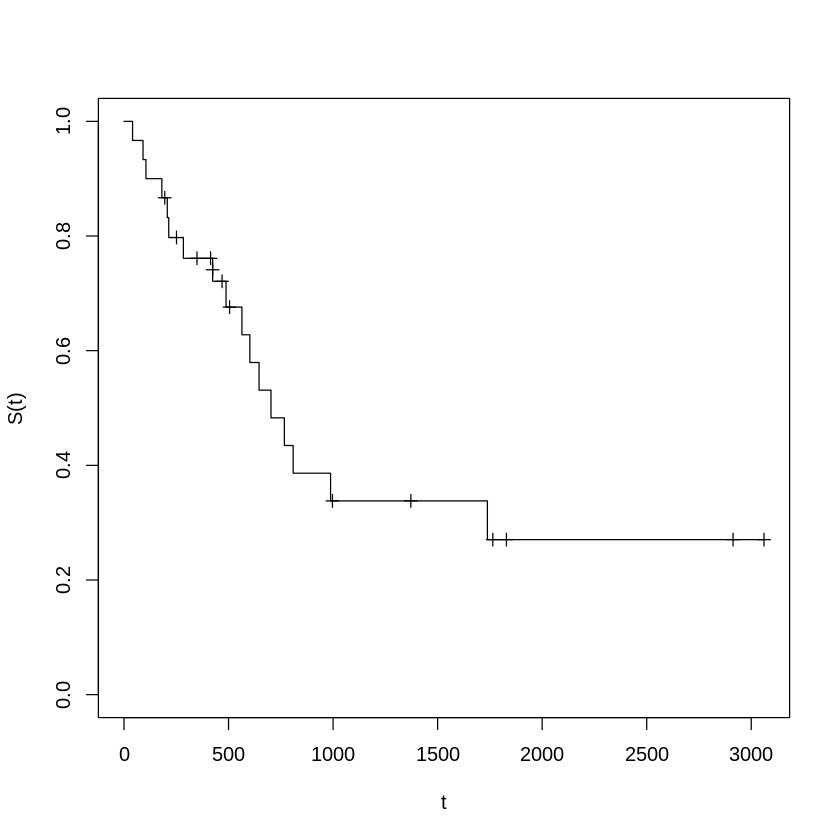

In [ ]:
plot(km, mark.time = TRUE, col = 1, conf.int = FALSE, xlab = "t", ylab = "S(t)")

Посмотрим на кривую с указанием доверительного интервала.

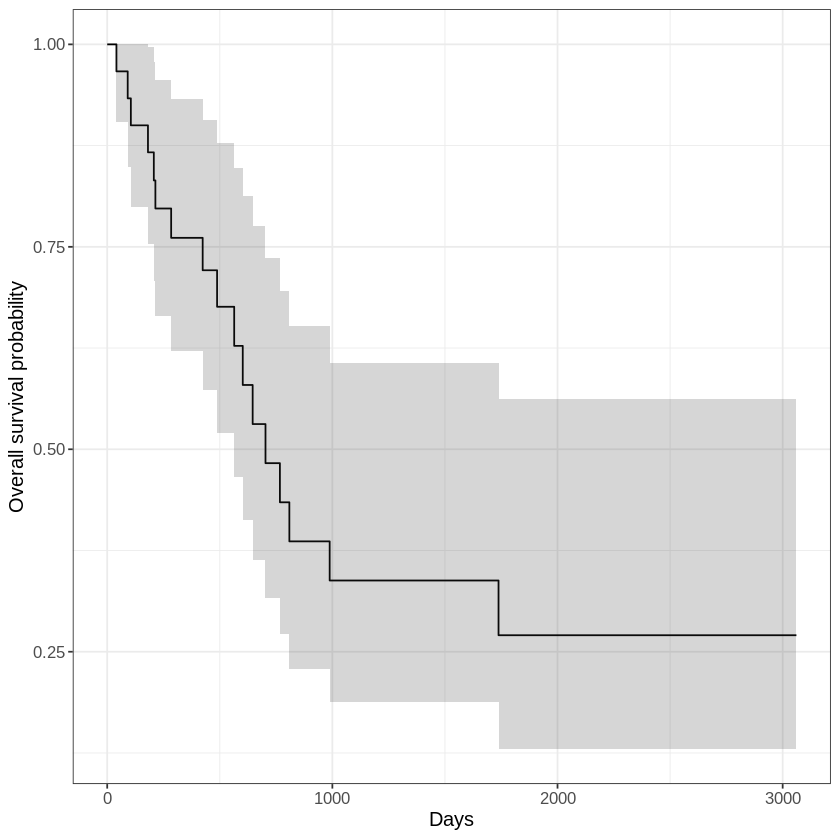

In [ ]:
survfit2(Surv(dni_zhil, 1 - zhiv) ~ 1, data = df) %>%
  ggsurvfit() +
  labs(
    x = "t",
    y = "S(t)"
  ) +
  add_confidence_interval()

Сравним времена дожития внутри групп в зависимости от пола.

Лог-ранговый критерий

In [ ]:
survdiff(Surv(dni_zhil, event = 1 - zhiv) ~ gender, data = df, rho = 0)

Call:
survdiff(formula = Surv(dni_zhil, event = 1 - zhiv) ~ gender, 
    data = df, rho = 0)

          N Observed Expected (O-E)^2/E (O-E)^2/V
gender=0 15        8     8.78    0.0700     0.146
gender=1 15        9     8.22    0.0749     0.146

 Chisq= 0.1  on 1 degrees of freedom, p= 0.7 

Гипотеза об однородности не отвергается.

Характеристики кривых

In [ ]:
sf <- survfit(Surv(dni_zhil, event = 1 - zhiv) ~ gender, data = df)
print(sf, print.rmean = TRUE)

Call: survfit(formula = Surv(dni_zhil, event = 1 - zhiv) ~ gender, 
    data = df)

          n events rmean* se(rmean) median 0.95LCL 0.95UCL
gender=0 15      8   1407       359    646     488      NA
gender=1 15      9   1084       319    767     602      NA
    * restricted mean with upper limit =  3061 


Критерий Гехана-Вилкоксона

In [ ]:
with(df, gehan.test(dni_zhil, 1 - zhiv, gender))

statistic =  -0.1503976 , p-value =  0.8804509 

Графики в зависимости от пола пациента

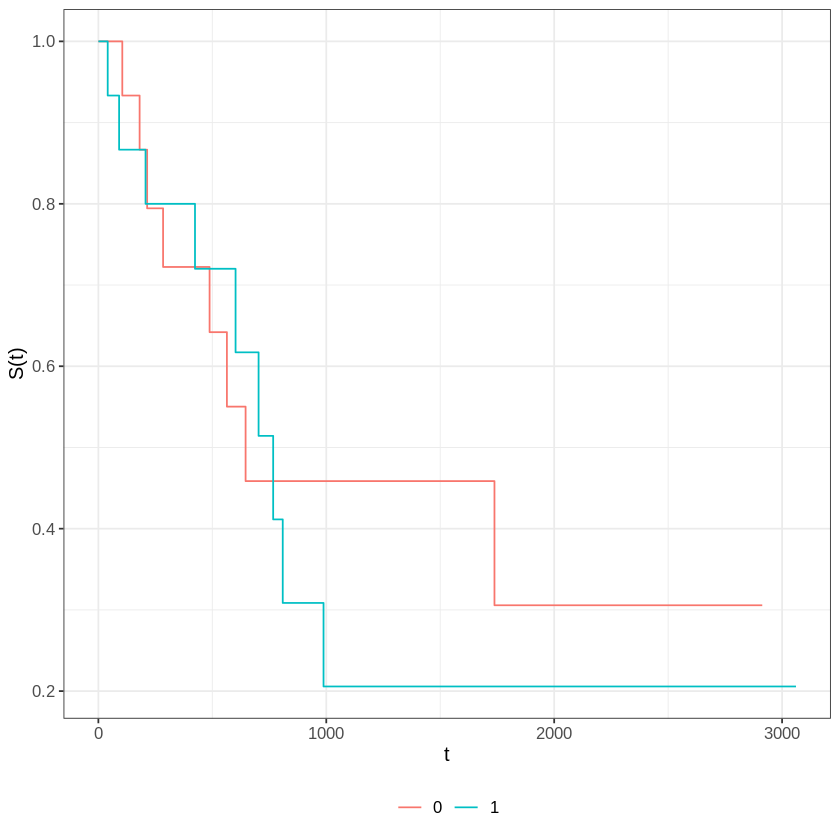

In [ ]:
survfit2(Surv(dni_zhil, 1 - zhiv) ~ gender, data = df) %>%
  ggsurvfit() +
  labs(
    x = "t",
    y = "S(t)"
  )

Регрессионная модель Кокса

In [ ]:
summary(coxph(Surv(dni_zhil, 1 - zhiv) ~ IgA3, data = df))

Call:
coxph(formula = Surv(dni_zhil, 1 - zhiv) ~ IgA3, data = df)

  n= 30, number of events= 17 

       coef exp(coef) se(coef)     z Pr(>|z|)
IgA3 0.3486    1.4172   0.2182 1.598     0.11

     exp(coef) exp(-coef) lower .95 upper .95
IgA3     1.417     0.7056    0.9241     2.173

Concordance= 0.581  (se = 0.099 )
Likelihood ratio test= 2.42  on 1 df,   p=0.1
Wald test            = 2.55  on 1 df,   p=0.1
Score (logrank) test = 2.6  on 1 df,   p=0.1
